In [44]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import matplotlib.pyplot as plt
from time import time
import sys
from abel.direct import direct_transform
from abel.tools.analytical import GaussianAnalytical
from xbeamfit import fitting
from xbeamfit import distributions 
import json
import numpy as np
import scipy as sp
import pandas as pd
import sys
import xbeamfit as xb 
from scipy import interpolate
from numpy import trapz
import scipy.integrate as integrate
from scipy import special
from scipy.stats import norm

from scipy.stats import chi
from scipy.stats import chi2

### q-Gaussian like a Gaussian histogram

Text(0.5, 0, 'Jx')

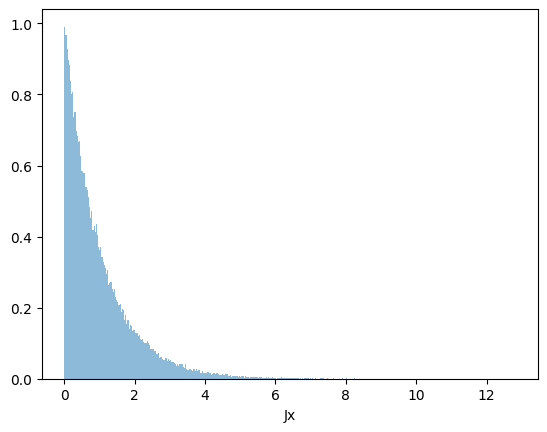

In [46]:
x_input = np.linspace(-20,20,20000)

q0 = 1

b0 =  1/(5-3*q0)
#sigma = 1/((b0)*(5-3*q0))
A0 = 1

pq = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
pq = np.nan_to_num(pq)

qx1 = np.random.choice(a=x_input,p=pq,size=100000)
qpx1 = np.random.choice(a=x_input,p=pq,size=100000)

plt.hist(((qx1**2+qpx1**2)/2),400,density=True,alpha=.5,label='q-Gaussian q='+str(q0)); 
plt.xlabel('Jx')

### q-Gaussian like a Gaussian Abel transform

Falling back to a pure Python backend...


/tmp/ipykernel_1887232/1798266137.py:24: RuntimeWarning: invalid value encountered in divide
  pdf_jx_1 = rho_r_r_q/r


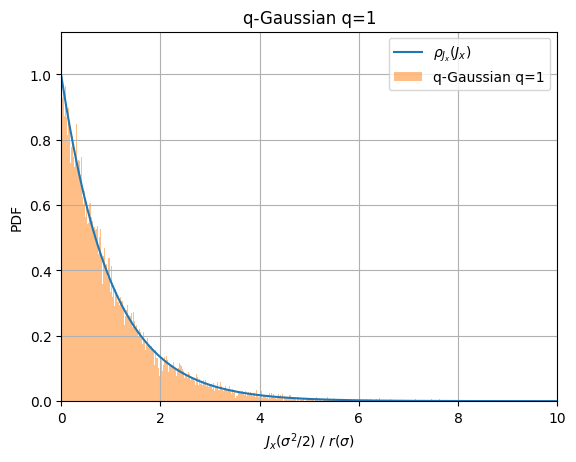

In [48]:
#  now do the same thing but with the Abel-transform inverse on the jx 

############ beam distribution symmetric about 0 
x = np.linspace(-100,100,20000)

q0=1
b0=1/(5-3*q0)


qgauss = xb.distributions.qGauss(x,mu=0,q=q0,A=1,b=b0)
qgauss = np.nan_to_num(qgauss, 0)




############ Inverse Abel transform 

r = np.linspace(0.0000,100,10000)
abel_qgauss = direct_transform(qgauss[10000:], dr=np.diff(r)[0], direction="Inverse", correction=True)

rho_r_r_q = r*abel_qgauss*2*np.pi
########### Find the pdf in Jx 

pdf_jx_1 = rho_r_r_q/r
jx = r**2/2

# make a normalisation and plot

factor = 2*np.pi
plt.figure()
plt.plot(jx,pdf_jx_1/factor, label='$\\rho_{J_x}(J_x)$')
plt.xlim([0,10])
plt.grid()
plt.title('q-Gaussian q=' + str(q0))
plt.xlabel('$J_x(\sigma^2$/2) / $r(\sigma)$')
plt.ylabel('PDF')
plt.hist(((qx1**2+qpx1**2)/2),4000,density=True,alpha=.5,label='q-Gaussian q=1'); 
plt.legend()


# now lets look at the normalisation of the pdf 
normalised_original = sp.integrate.trapz(pdf_jx_1, x=jx, dx=1, axis=-1,) # the normalisation isnt the same, so something strange is happening
print('total area under jx ' + normalised_original)



### q-Gaussian q=1.3


(0.0, 10.0)

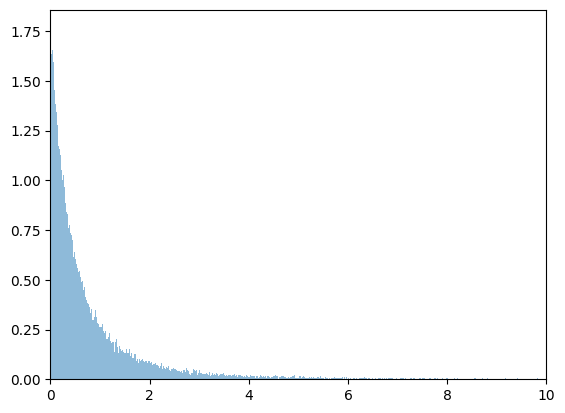

In [55]:
n = 100
sample=50000
sample_05 = 25000
x_input = np.linspace(-n,n,sample)

q0 = 1.3
b0 =  1/(5-3*q0)
#sigma = 1/((b0)*(5-3*q0))
A0 = 1


xq= xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
xq = np.nan_to_num(xq)


pq = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
pq = np.nan_to_num(pq)

qx13 = np.random.choice(a=x_input,p=xq,size=80000)
qpx13 = np.random.choice(a=x_input,p=pq,size=80000)


plt.figure()
plt.hist((qx13**2+qpx13**2)/2,40000,density=True,alpha=.5,label='q-Gaussian q='+str(q0)); 
plt.xlim([0,10])




### q-Gaussian q=1.3 Abel transform method 

Falling back to a pure Python backend...


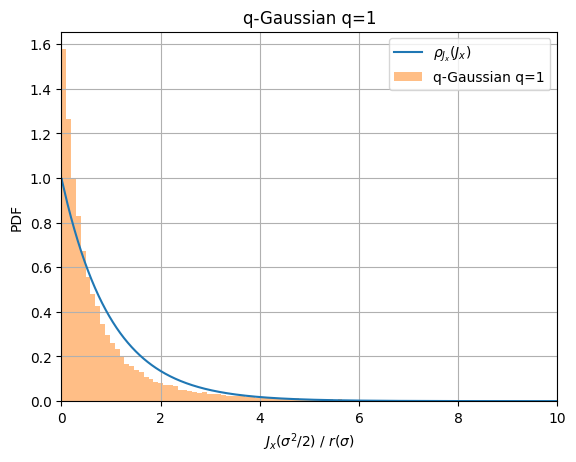

In [50]:
#  now do the same thing but with the Abel-transform inverse on the jx 

############ beam distribution symmetric about 0 
x = np.linspace(-n,n,sample)

q0=q0
b0=1/(5-3*q0)


qgauss = xb.distributions.qGauss(x,mu=0,q=q0,A=1,b=b0)
qgauss = np.nan_to_num(qgauss.copy(), 0)




############ Inverse Abel transform 

r = np.linspace(0.00001,n+0.00001,sample_05)
abel_qgauss = direct_transform(qgauss[sample_05:], dr=np.diff(r)[0], direction="Inverse", correction=True) # direct requires fine sampling 

rho_r_r_q = abel_qgauss*(2*np.pi*r)

########### Find the pdf in Jx 

pdf_jx_13 = rho_r_r_q/r
jx = r**2/2 # should make a C backend for quicker computations ... 
# do we really want the correction to be on? 



# make a normalisation and plot

factor = 2*np.pi
plt.figure()
plt.plot(jx,pdf_jx_13/factor, label='$\\rho_{J_x}(J_x)$')
plt.xlim([0,10])
plt.grid()
plt.title('q-Gaussian q=' + str(q0))
plt.xlabel('$J_x(\sigma^2$/2) / $r(\sigma)$')
plt.ylabel('PDF')
plt.hist(((qx13**2+qpx13**2)/2),4000,density=True,alpha=.5,label='q-Gaussian q=1.3'); 
plt.legend()


# now lets look at the normalisation of the pdf 
normalised_original = sp.integrate.trapz(pdf_jx_13, x=jx, dx=1, axis=-1,) # the normalisation isnt the same, so something strange is happening
normalised_original


In [54]:
normalised_original = sp.integrate.trapz(pdf_jx_13, x=jx, dx=1, axis=-1,) # the normalisation isnt the same, so something strange is happening
print(normalised_original)
print(2*np.pi)

6.273210724473382
6.283185307179586


### q-Gaussian q=1.6 Histogram

(0.0, 10.0)

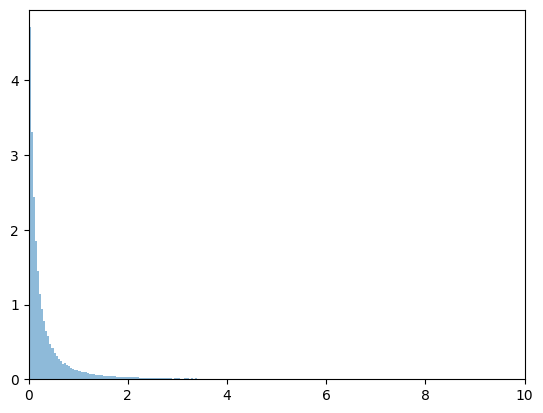

In [63]:


n = 100
sample=50000
sample_05 = 25000
x_input = np.linspace(-n,n,sample)

q0 = 1.6
b0 =  1/(5-3*q0)
#sigma = 1/((b0)*(5-3*q0))
A0 = 1


xq= xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
xq = np.nan_to_num(xq)


pq = xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0)/np.sum(xb.distributions.qGauss(x_input, mu=0, A=A0, b=b0, q=q0))
pq = np.nan_to_num(pq)

qx16 = np.random.choice(a=x_input,p=xq,size=80000)
qpx16 = np.random.choice(a=x_input,p=pq,size=80000)


plt.figure()
plt.hist((qx16**2+qpx16**2)/2,40000,density=True,alpha=.5,label='q-Gaussian q='+str(q0)); 
plt.xlim([0,10])


### q-Gaussian q=1.6 Abel transform

Falling back to a pure Python backend...


5.039646363945449

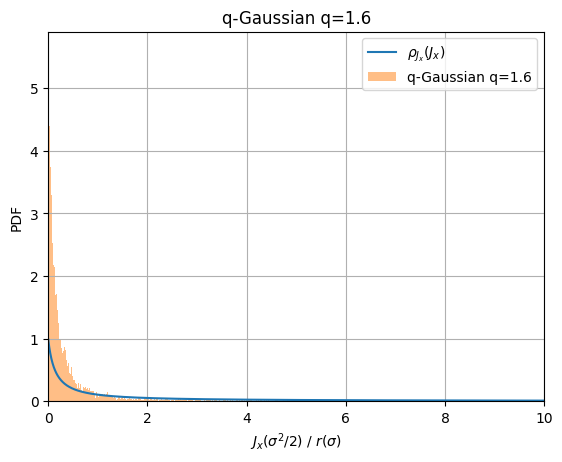

In [64]:
#  now do the same thing but with the Abel-transform inverse on the jx 

############ beam distribution symmetric about 0 
x = np.linspace(-n,n,sample)

q0=q0
b0=1/(5-3*q0)


qgauss = xb.distributions.qGauss(x,mu=0,q=q0,A=1,b=b0)
qgauss = np.nan_to_num(qgauss.copy(), 0)




############ Inverse Abel transform 

r = np.linspace(0.00001,n+0.00001,sample_05)
abel_qgauss = direct_transform(qgauss[sample_05:], dr=np.diff(r)[0], direction="Inverse", correction=True) # direct requires fine sampling 

rho_r_r_q = abel_qgauss*(2*np.pi*r)

########### Find the pdf in Jx 

pdf_jx_16 = rho_r_r_q/r
jx = r**2/2 # should make a C backend for quicker computations ... 
# do we really want the correction to be on? 



# make a normalisation and plot

factor = 2*np.pi
plt.figure()
plt.plot(jx,pdf_jx_16/factor, label='$\\rho_{J_x}(J_x)$')
plt.xlim([0,10])
plt.grid()
plt.title('q-Gaussian q=' + str(q0))
plt.xlabel('$J_x(\sigma^2$/2) / $r(\sigma)$')
plt.ylabel('PDF')
plt.hist(((qx16**2+qpx16**2)/2),bins=4000,range=[0,10],density=True,alpha=.5,label='q-Gaussian q=1.6'); 
plt.legend()


# now lets look at the normalisation of the pdf 
normalised_original = sp.integrate.trapz(pdf_jx_13, x=jx, dx=1, axis=-1,) # the normalisation isnt the same, so something strange is happening
normalised_original # 

### show that the q-gaussian made is the same as one from xbeamfit 

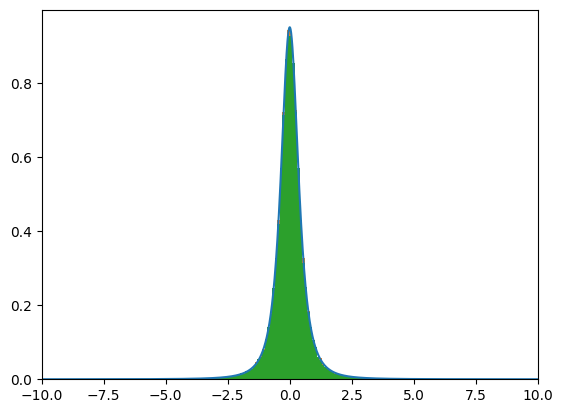

In [66]:
plt.plot(x, qgauss, )
plt.xlim([-10,10])
plt.hist(qx16, bins=400, range=[-20,20], density=True);
plt.hist(qpx16, bins=400, range=[-20,20], density=True); 

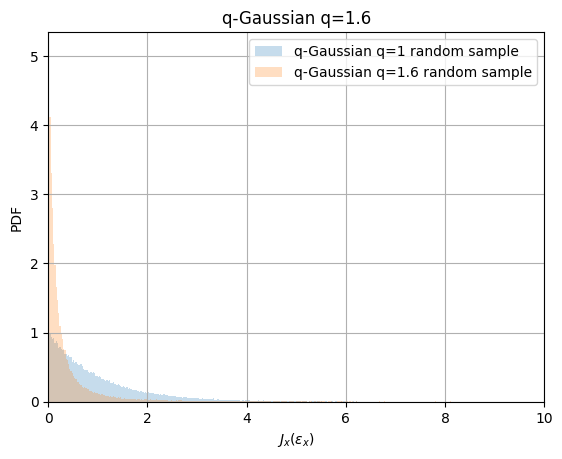

In [67]:

factor = 2*np.pi
plt.figure()

plt.xlim([0,10])
plt.grid()
plt.title('q-Gaussian q=' + str(q0))
plt.xlabel('$J_x(\epsilon_x)$' )
plt.ylabel('PDF')
plt.hist(((qx1**2+qpx1**2)/2),bins=400, range=[0,10],density=True,alpha=.25,label='q-Gaussian q=1 random sample', ); 
plt.hist(((qx16**2+qpx16**2)/2),bins=400,density=True, range=[0,10],alpha=.25,label='q-Gaussian q=1.6 random sample', ); 

plt.legend()


In [176]:
# integrate under the curve jx  

normalised_original = sp.integrate.trapz(pdf_jx_1, x=jx, dx=1, axis=-1,)

# the normalisation is in fact 2*pi 

In [186]:
# now lets look at the normalisation of the pdf 
normalised_original = sp.integrate.trapz(pdf_jx_13, x=jx, dx=1, axis=-1,) # the normalisation isnt the same, so something strange is happening
normalised_original


6.257520110767134

In [213]:
# now lets look at the normalisation of the pdf 
normalised_original = sp.integrate.trapz(qgauss, x=x, dx=1, axis=-1,) # the normalisation isnt the same, so something strange is happening
normalised_original

0.999999985004998

In [187]:
np.pi*2

6.283185307179586